## Unit 3, Part II: Descriptive Statistics - Heart Disease Data

Kyle P. Rasku MS BSN RN

In lecture this week, we discussed the importance of descriptive statistics.  These summaries and explorations help us to understand the forces driving a dataset, and help us to understand the people behind the numbers.  

Good descriptive statistics help us assess the direction, amount and strength of associations between data points, and allow us to reflect on what we know about the real-world sources of these data points.  Do we agree with the mathematical measures we see, or do we detect possible confounding?

Every analysis starts with a good descriptive analysis!


In [ ]:
%matplotlib inline
import matplotlib.pylab
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(12,10))
import pandas as pd
import numpy as np
import datetime
import math

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets


In [ ]:
# metadata
# print(heart_disease.metadata)

for key, value in heart_disease.metadata.items():
    print(f"{key}: {value}")

uci_id: 45
name: Heart Disease
repository_url: https://archive.ics.uci.edu/dataset/45/heart+disease
data_url: https://archive.ics.uci.edu/static/public/45/data.csv
abstract: 4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach
area: Health and Medicine
tasks: ['Classification']
characteristics: ['Multivariate']
num_instances: 303
num_features: 13
feature_types: ['Categorical', 'Integer', 'Real']
demographics: ['Age', 'Sex']
target_col: ['num']
index_col: None
has_missing_values: yes
missing_values_symbol: NaN
year_of_dataset_creation: 1989
last_updated: Fri Nov 03 2023
dataset_doi: 10.24432/C52P4X
creators: ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano']
intro_paper: {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. Guppy, S. Lee, V. Froelicher', 'published_in': 'American Journal of Card

In [ ]:
# variable information
vdesc = pd.DataFrame(heart_disease.variables)
vdesc

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [ ]:
# Load some data

heart = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")
heart_backup = heart.copy()
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Typically, we first look at the shape of the data - how many rows / instances (n), and how many columns / data points?

In [ ]:
heart.shape

(303, 14)

In this small data set about heart health, there are 303 rows (n), and 14 columns / data points.

Now, we need to see how many missing values the data has.  Sometimes, when there are a lot of missing values, it is important to make judgment calls about how to handle the missing data.

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


The data as loaded has few missing values.  There are 4 values missing from 'ca', 2 values missing from 'thal'.

Let's see those rows.

In [ ]:
heart[heart['ca'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [ ]:
heart[heart['thal'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2


Since we're just looking at descriptive measures and there are few NULL values, we don't have to do anything other than identify the rows.

Now, let's examine what the data points are.  Below is a summary of the data points / columns and their meanings, taken from the data dictionary for this data set.  A data dictionary tells us what the data points are, what type they are, and may also tell us how they should - or should not - be used.  Data dictionaries for large, multi-year data collections and surveys are very important to pay attention to, because they specify analysis and comparison limitations in the data.

### Data Points Summary: Heart Disease Data

- **age**: age in years
- **sex**: sex (1 = male; 0 = female)
- **cp**: chest pain type: 1 typical angina, 2 atypical angina, 3 non-anginal pain, 4 asymptomatic
- **trestbps**: resting blood pressure (in mmHg on admission to the hospital)
- **chol**: serum cholestoral in mg/dl
- **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **restecg**: resting electrocardiographic results: 0 normal, 1 ST-T wave abnormality (T inversion and/or ST elevation or depression of > 0.05 mV), 2 probable or definite LVH by Estes' criteria
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment: 1 upsloping, 2 flat, 3 downsloping
- **ca**: number of major vessels (0-3) colored by flourosopy
- **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
- **num**: diagnosis of heart disease (angiographic disease status): 0 < 50% narrowing, 1 > 50% narrowing in any major vessel

### Data types

- **age**: continuous, ratio
- **sex**: categorical, nominal
- **cp**: categorical, nominal
- **trestbps**: continuous, interval
- **chol**: continuous, interval
- **fbs**: categorical, ordinal
- **restecg**: categorical, ordinal
- **thalach**: continuous, ratio
- **exang**: categorical, ordinal
- **oldpeak**: continuous, ratio
- **slope**: categorical, nominal
- **ca**: continuous, ratio (count)
- **thal**: categorical, nominal
- **num**: categorical, nominal (outcome)

Looking at the meanings and types of each of the data points in the data set provides us with a baseline understanding of what types of descriptive analyses we can do with the data.

Categorical data points cannot be summarized using summary measures designed for interval or ratio data.  However, they *can* be summarized in other ways, for example, by using counts or by stratifying counts by another category.

#### Below, the describe() function is applied to the pandas dataframe of all the heart disease data, to produce a summary dataframe.

To gain meaningful insights, the dataframe must be divided between categorical and continuous variables before the function is called.  Since the columns specified as categorical in the data dictionary were not yet marked categorical in our dataframe, I've fixed that by first calling the pd.Categorical() function on each categorical column.

In [ ]:
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
for c in categorical_columns:
    heart[c] = pd.Categorical(heart[c])

In [ ]:
heart_categorical = heart[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]].copy()
heart_continuous = heart[["age", "trestbps", "chol", "thalach", "oldpeak", "ca", "num"]].copy()

In [ ]:
heart_categorical.describe()

,sex,cp,fbs,restecg,exang,slope,thal
count,303,303,303,303,303,303,301.0
unique,2,4,2,3,2,3,3.0
top,1,4,0,0,0,1,3.0
freq,206,144,258,151,204,142,166.0


In [ ]:
heart_continuous.describe()

,age,trestbps,chol,thalach,oldpeak,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241,0.937294
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438,1.228536
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


You can see that, depending on the type of data (categorical vs. continuous), the describe function provides the correct kind of summary description of the data. (Although, min, max and quartile data can all apply to categorical data as well).

Below, let's use the continuous data points, and add the IQR, range, and variance to the summary dataframe.

The transpose() function, below, rotates the table so the rows become columns, and the columns become rows.

In [ ]:
heart_summary = heart_continuous.describe().transpose()

heart_summary["IQR"] = heart_summary["75%"] - heart_summary["25%"]
heart_summary["range"] = heart_summary["max"] - heart_summary["min"]
heart_summary["var"] = heart_summary["std"]*heart_summary["std"]

heart_summary = heart_summary.transpose()
heart_summary

,age,trestbps,chol,thalach,oldpeak,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241,0.937294
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438,1.228536
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000
IQR,13.000000,20.000000,64.000000,32.500000,1.600000,1.000000,2.000000
range,48.000000,106.000000,438.000000,131.000000,6.200000,3.000000,4.000000


## Measures of Central Tendency

By taking a closer look at these measures, we can tell quite a bit about the data set already!

For example, variance in cholesterol levels is much larger than variance in ST depression or vessels colored by flouroscopy (this count was limited to between 0 and 3).  

#### Examining the Five Number Summary

The 5 number summary provides insight into the distribution of values for one variable by describing the order that values fall in. The five statistics in this summary are the following, from highest to lowest data values:

- Highest value in the dataset (MAX)
- Third quartile; greater than 75% of the values in the dataset (Q3)
- Median or second quartile; splits the dataset in half (Q2)
- First quartile; greater than 25% of the values (Q1)
- Lowest value in the dataset (MIN)

Because if focuses on order, the five number summary works to describe either categorical or continuous data points.

The summary is also less sensitive to skewed distributions and outliers, and more **robust** than the mean and standard deviation.

#### Robustness

"Robust statistics" provide valid results across wider range of conditions, including assumption violations and the presence of outliers. The term "robust" can be applied to both a statistic (such as the median) and statistical analyses (such as hypothesis testing or regression).

Since they are not sensitive to outliers or skewness, the median & IQR may be favored over mean and standard deviation in real-world contexts where data fails tests of normality (more on that next week).

References:

Frost, J. (2021). "5 Number Summary: Definition, Finding & Using", Statistics By Jim; https://statisticsbyjim.com/basics/five-number-summary/

Frost, J. (2023). "What are Robust Statistics?", Statistics By Jim; https://statisticsbyjim.com/basics/robust-statistics/

## Box and Whisker Plots

Box and Whisker or Box Plots are great for getting a quick overview of the Five Number Summary for each data point.

Prior to plotting them, let's standardize the data, to get it to a more comparable scale. Standardizing the data scales each feature to have a mean of 0 and a standard deviation of 1, making the data points easier to compare side by side.

Note: Standardization is often used in machine learning algorithms where it is more important to be able to compare the data points to one another using a distance measure than it is to retain their absolute values.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
heart_standardized = pd.DataFrame(scaler.fit_transform(heart_continuous), columns=heart_continuous.columns)


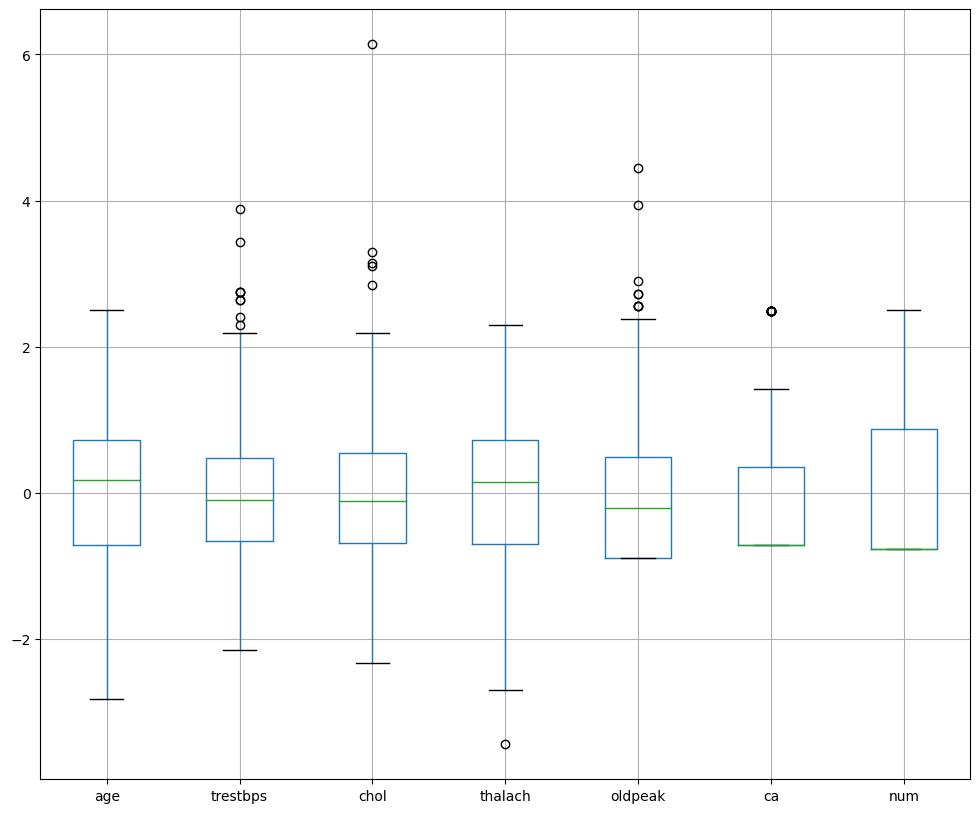

In [ ]:
heart_standardized.boxplot()
plt.show()

While we can't see specific values in a standardized, frame-wide plot like the one above, we *can* see things like the spread, outliers, skew and range of each data point, overall.

We can always go back to examine a particular point of interest more closely:

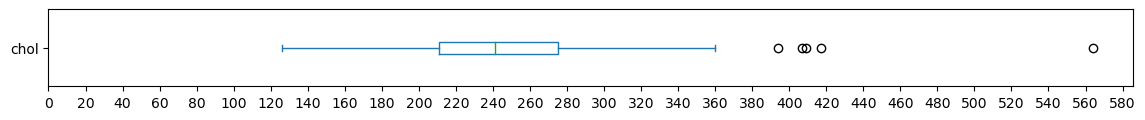

In [ ]:
fig, ax = plt.subplots(figsize=(14, 1))
heart_continuous['chol'].plot(kind='box', vert=False, ax=ax)
ax.set_xticks(range(0, 600, 20))
plt.show()

In [ ]:
heart_summary['chol'].to_frame(name='Serum Cholestoral in mg/dL')

,Serum Cholestoral in mg/dL
count,303.000000
mean,246.693069
std,51.776918
min,126.000000
25%,211.000000
50%,241.000000
75%,275.000000
max,564.000000
IQR,64.000000
range,438.000000


## Serum Cholesterol mg/dL

Here we can see the median of 241, Q1 at the left end of the box (211), and Q3 at the right end (275).  

The range is 438, which is quite wide.  The min value of 126 is a good value for a cholesterol reading, while the median value in this data set is not only above the recommended maximum of 200, but falls within the 'High' category:

https://www.healthline.com/health/high-cholesterol/levels-by-age#adults

There are some extreme outliers as well.  First, a cluster around 410, then an extreme value at 564.  These outliers pull on the value of the mean (246.7), making it higher than the median (241.0).

The IQR is 64; for this data, this would be the more reasonable measure of spread.  Can you think of why this would be?

HINT: Think about the changes in variance related to the ultimate spread of the data, and how this relates to the standard deviation.


## 'Robustifying' the Mean

One way statisticians sometimes improve the robustness of the mean is to trim it.  Calculating a 'trimmed mean' involves removing some percentage of the outliers, and then recalculating.

First, we have to sort the data, to facilitate trimming.

Then, determine the % of values to remove from the end(s) of the data set.  This has to be considered carefully, because by trimming, data is being excluded from the analysis.

Next, calculate the number of observations to trim using the % cutoff, rounding to the nearest integer.

Discard the designated # of observations from either end of the sorted data set, then calculate the trimmed mean.

In [ ]:
sorted_chol = heart_continuous['chol'].sort_values()
# A common trim is 10% of values, but because this is a small dataset, I'm going with 2%
to_trim = round(.02 * len(sorted_chol))
to_trim

6

Removing 2% of values has us removing 6 values.  These could be removed from either end, or just one end.  In this case, I'm going to remove the six highest values because they are more anomalous.  

In [ ]:
sorted_chol = sorted_chol.iloc[:-6]
sorted_chol.mean()

243.0875420875421

#### 'Robustification' of the mean has had the predicted impact:

By removing outliers, the trimmed mean value, 243.1, lies in between the mean (247) and the median (241).

Reference:
Frost, J. (2023). "Trimmed Mean: Definition, Calculating & Benefits", Statistics By Jim; https://statisticsbyjim.com/basics/trimmed-mean/

# Graphical Descriptions

## Histograms

To get an idea / overview of the distribution of our continuous data points, we look at the histograms (below).

The histograms show that the first four data points: age, resting blood pressure ('trestbps'), cholesterol, and max heart rate ('thalach'), have a nearly normal / Gaussian distribution.  You'll learn more about distributions next week, but this is the one that looks like a 'bell curve'.  

### Skewness

Skewness is the statistical measure that captures the degree of asymmetry of a distribution around its mean.

Positive skewness indicates a distribution with a longer tail on the right side, while negative skewness indicates a longer tail on the left side.

It quantifies the extent to which a distribution deviates from symmetry.

Looking at the first four histograms below, are the data positively skewed or negatively skewed?

The last two plots show data that has no 'bell curve'.  We'll learn more about how this data is distributed next week; for now, we can just see that these two, while similar to each other, are not like the others:

ST depression induced by exercise relative to rest ('oldpeak') and number of major vessels (0-3) colored by flourosopy ('ca') - both clustered around 'zero'.

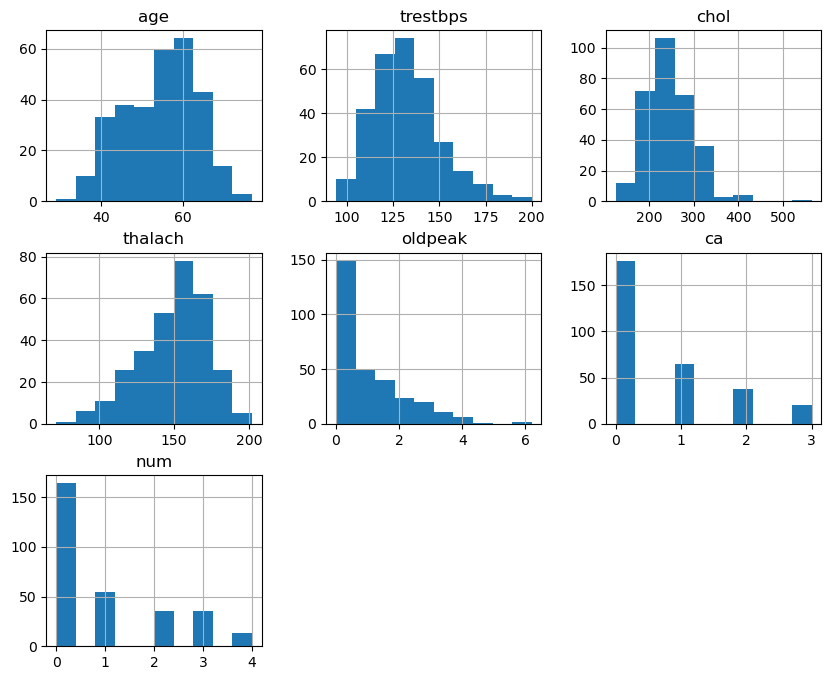

In [ ]:
# Plotting histograms for each numerical column
heart_continuous.hist(bins=10, figsize=(10, 8))
plt.show()

Descriptive Summary - Normally-distributed Data, Resting Blood Pressure mmHg ('trestbps')

In [ ]:
heart_summary['trestbps'].to_frame(name='Resting Blood Pressure mmHg')

,Resting Blood Pressure mmHg
count,303.000000
mean,131.689769
std,17.599748
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000
IQR,20.000000
range,106.000000


Descriptive Summary - Non-normally-distributed Data, Exercise-induced ST Depression (mm)

In [ ]:
heart_summary['oldpeak'].to_frame(name='Exercise-induced ST Depression (mm)')

,Exercise-induced ST Depression (mm)
count,303.000000
mean,1.039604
std,1.161075
min,0.000000
25%,0.000000
50%,0.800000
75%,1.600000
max,6.200000
IQR,1.600000
range,6.200000


## Pie Charts

Pie charts represent proportions well. This is good for looking at relative prevalence, such as males vs. females, or the proportion of types of chest pain among the participants studied.

sex: sex (1 = male; 0 = female)

cp: chest pain type: 1 typical angina, 2 atypical angina, 3 non-anginal pain, 4 asymptomatic

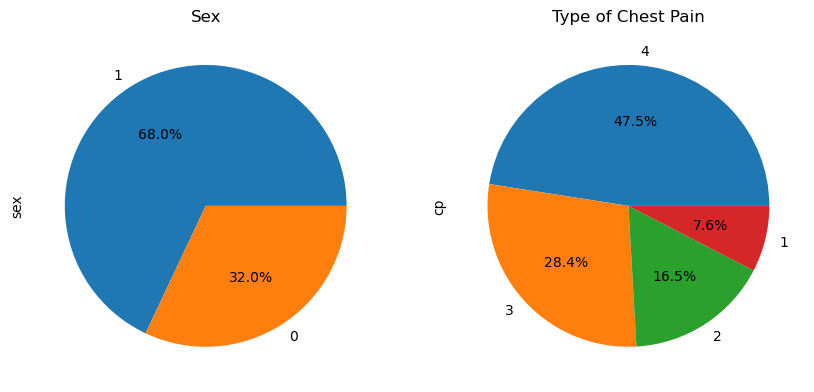

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


heart_categorical['sex'] = heart_categorical['sex'].cat.as_ordered()
heart_categorical['cp'] = heart_categorical['cp'].cat.as_ordered()

sex_counts = heart_categorical['sex'].value_counts()
cp_counts = heart_categorical['cp'].value_counts()

sex_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax1, title='Sex')
cp_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2, title='Type of Chest Pain')

plt.show()

Proportionally, we quickly see there are more males than females, and the most common chest pain type is asymptomatic, followed by non-anginal pain, and that - in fact - only 7.6% of the patients had typical angina.  

# Covariance, Correlation Coefficient and Effect Modification

In this section, we'll explore relationships between two or more variables.

## Covariance

When two measures vary simultaneously, each can be summarized using the Measures of Central Tendency.  However, we may want to know how they vary jointly relative to each other.

Let's see and interpret the covariance of age and maximum heart rate achieved ('thalach').

In [ ]:
covariance_matrix = np.cov(heart_continuous['age'], heart_continuous['thalach'])
covariance = covariance_matrix[0, 1]

print("Covariance between Age and Maximum Heart Rate Achieved:", covariance)

Covariance between Age and Maximum Heart Rate Achieved: -81.42306515419754


The covariance between age and maximum heart rate achieved being large and negative (-81.423) indicates a **strong inverse relationship between these two variables**.

In other words, as age increases, the maximum heart rate achieved tends to decrease, and vice versa.

The large magnitude of the covariance suggests that this relationship is quite strong.

## Scatterplots

Scatterplots allow us to look at two readings to get a quick overview of their relationship to one another.

Here's a quick look at the two variables we just calculated the Covariance for - Age and Maximum Heart Rate Achieved.

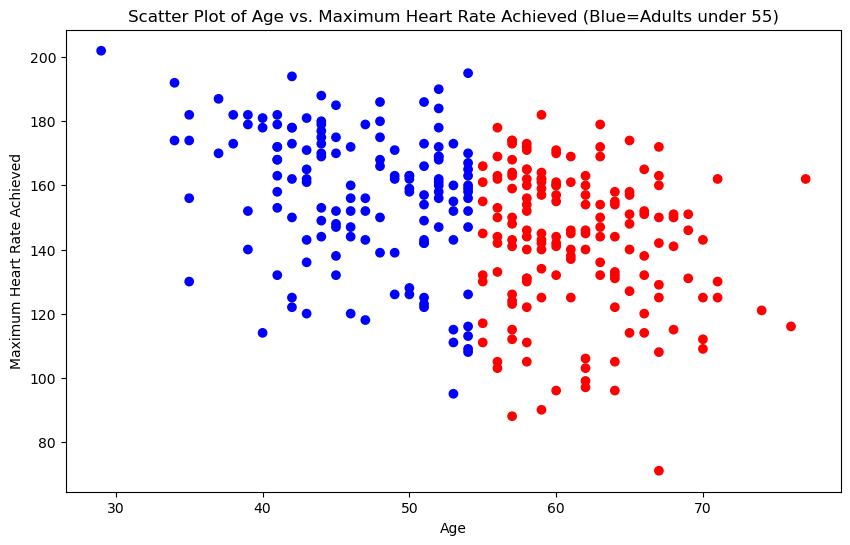

In [ ]:
colors = ['blue' if value < 55 else 'red' for value in heart_continuous['age']]

plt.figure(figsize=(10, 6))
plt.scatter(heart_continuous['age'], heart_continuous['thalach'], c=colors)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Scatter Plot of Age vs. Maximum Heart Rate Achieved (Blue=Adults under 55)')
plt.show()

The scatterplot above shows people 55 and under in blue, and those over 55 in red.

We can see the negative relationship between the two variables, as illustrated by the covariance metric we calculated.

Later, when we learn regression, we'll be able to confirm this relationship by fitting a line to the data.

### The Correlation Coefficient for Continous Variables

The Pearson correlation coefficient, is a standardized covariance indicator that measures the relationship between two variables on a scale between -1 (when one variable increases the other always decreases) and 1 (when one variable increases the other always increases).  The closer to zero the correlation coefficient value, the more likely it is that there is **no relationship at all** between the two variables.



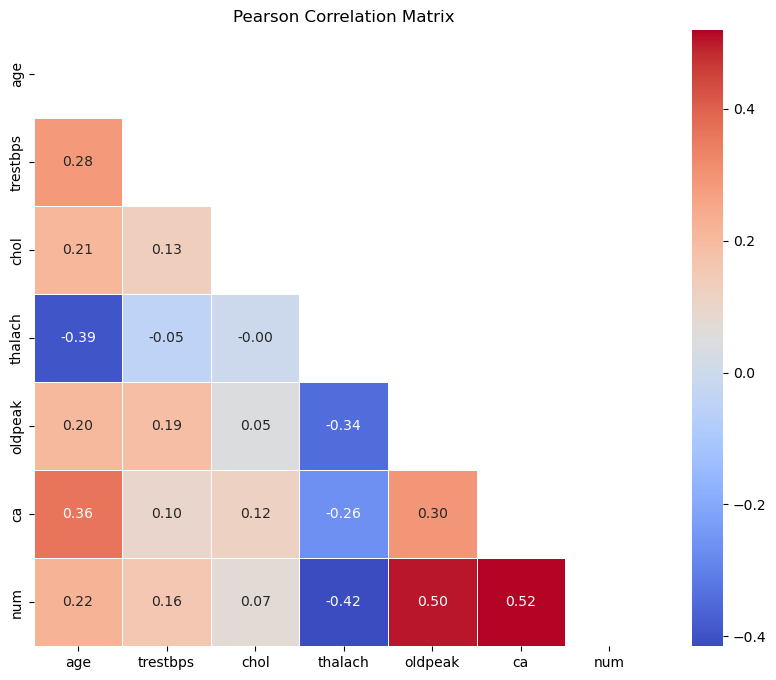

In [ ]:
import seaborn as sns
correlation_matrix = heart_continuous.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', mask=mask)
plt.title('Pearson Correlation Matrix')
plt.show()

The Pearson correlation coefficients between all the continuous variables in the heart disease data set are shown in the above heatmap.  Quickly, our eyes are drawn to the darker blue (stronger negative correlation) and darker red (stronger positive correlation) areas.

In this dataset, 'Num' (An indicator of the diagnosis of heart disease based on angiographic disease status, where 0 indicates < 50% narrowing in any major vessel and 1 indicates > 50% narrowing in any major vessel, is considered the outcome variable.

To brush up on the major vessels, click here:
https://watchlearnlive.heart.org/CVML_Mobile.php?moduleSelect=corart

What more-strongly correlated continuous variables in the dataset do you think might help to predict the value of 'Num'?

**Note that correlation methods only measure relationships along a straight line.**  Some variables may be related in a nonlinear way, but are still very much related.  For example, weight is a power of height, and growth is a log(time).  

### The Correlation Coefficient for Rank-Order Variables

While Pearson measures the correlation between continuous variables, rank-ordered variables can also have correlation, and this correlation can be computed using the Spearman Rank correlation coefficient.  

We can use this to look at the relationship between 'exang', exercise-induced angina where 0 is 'no' and 1 is 'yes', and 'restecg', where 0 is normal, 1 is ST-T wave abnormality (T inversion and/or ST elevation or depression of > 0.05 mV (clinically significant)), and 2 is probable or definite LVH by Estes' criteria: https://www.merckmanuals.com/medical-calculators/RomhiltEstes.htm

In [ ]:
from scipy.stats import spearmanr

# Calculate Spearman rank correlation coefficient
corr, p_value = spearmanr(heart_categorical['exang'], heart_categorical['restecg'])

# Print the results
print(f"Spearman Rank Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman Rank Correlation Coefficient: 0.085
P-value: 0.140


This result indicates there's no significant relationship between the two variables.

Can you explain why?

### Tetrachoric and Polychoric Correlation

An estimate of association using joint frequencies of categorical variables.

First, let's look at joint frequency / contingency table of Sex and Num (Heart Disease, 0=No, 1+=Yes):

In [ ]:
freq_table = pd.crosstab(heart['sex'], heart['num'], margins=True)

freq_table

num,0,1,2,3,4,All
sex,,,,,,
0,72,9,7,7,2,97
1,92,46,29,28,11,206
All,164,55,36,35,13,303


By the looks of the joint frequencies, a far larger % of males in our sample dataset appear to have heart disease.

In [ ]:
from semopy import Model

model_desc = "num ~ sex"
model = Model(model_desc)
model.fit(heart)
model.inspect()


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,num,~,sex,0.590144,0.147174,4.009828,0.000061
1,num,~~,num,1.428438,0.116053,12.308534,0.000000


The polychoric correlation coefficient estimate, 0.59, along with the p-value <0.0001, confirms that there is a positive correlation between sex=1 (Male) and an increase in Num, the Heart Disease marker.